# Capturing greenhouse gases with data

## Model Development

### by Zachary Brown

Now that my dataset has been cleaned, explored, and preprocessed, it's time to begin testing a range of models to determine which can best predict the volumetric CO2 working capacity and then explore which features boost that capacity the most.

I'll start by installing the necessary libraries and then importing everything we'll need.

In [ ]:
!pip install xgboost==1.7.4
!pip install lightgbm==3.3.5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from matplotlib import rcParams

In [2]:
sns.set_theme('notebook')
rcParams['mathtext.default'] = 'regular'

Let's start by importing the training data.

In [3]:
X_train = pd.read_csv('../data/processed/X_train.csv', index_col = 'filename')
y_train = pd.read_csv('../data/processed/y_train.csv', index_col = 0)

In [4]:
X_train.head()

,unit_cell_volume,Density,accessible_surface_area,volumetric_surface_area,gravimetric_surface_area,accessible_volume_per_uc,volume_fraction,grav_volume,probe_occupiable_vol,probe_occ_vol_frac,...,lc-S-0-all,lc-S-1-all,lc-S-2-all,lc-S-3-all,lc-alpha-0-all,lc-alpha-1-all,lc-alpha-2-all,lc-alpha-3-all,D_lc-chi-2-all,D_lc-S-2-all
filename,,,,,,,,,,,,,,,,,,,,,
DB0-m3_o25_o84_f0_fsc.sym.10.cif,1143.94,1.003360,207.585,1814.65,1808.58,137.9590,0.12060,0.120196,520.493,0.4550,...,0.547700,0.569800,0.83625,1.428350,41.425,71.755000,85.800000,185.320000,0.690,-0.030000
DB0-m2_o26_o27_f0_pcu.sym.20.cif,5289.09,0.330792,845.532,1598.63,4832.75,3122.8900,0.59044,1.784930,4432.260,0.8380,...,0.542767,0.759733,1.30000,1.126967,36.980,95.673333,136.635076,129.961743,1.480,0.213333
DB0-m3_o23_o23_f0_nbo.sym.54.cif,16203.70,0.208859,2160.230,1333.17,6383.11,11222.0000,0.69256,3.315920,13627.300,0.8410,...,0.532900,0.562100,1.09500,0.562100,28.090,59.890000,87.980000,59.890000,0.890,-0.040000
DB0-m3_o1_o146_f0_fsc.sym.37.cif,1661.86,0.944809,178.499,1074.10,1136.84,69.6984,0.04194,0.044390,465.320,0.2800,...,0.547700,0.858550,1.40250,1.120850,41.425,113.565000,160.962614,120.622614,1.775,0.340000
DB0-m29_o89_o500_f0_pts.sym.68.cif,1886.38,0.849738,290.885,1542.03,1814.71,200.5980,0.10634,0.125145,821.519,0.4355,...,0.532900,0.562100,1.09500,1.124200,28.090,59.890000,87.980000,119.780000,0.890,-0.040000


In [5]:
y_train.head()

,0
0,82.851179
1,1.141462
2,0.623254
3,32.874921
4,20.352463


Now I want to perform an initial train/test split using just 10% of this data to train initial models so I can get a quick feel for how well each model will perform.

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.9, random_state=15)

In [7]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((20475, 450), (184275, 450), (20475, 1), (184275, 1))

In [8]:
# Reshape y_train for model fitting
y_tr = y_tr.values.ravel()
y_te = y_te.values.ravel()

In [9]:
y_tr.shape, y_te.shape

((20475,), (184275,))

I'm going to replace some characters that may be in the datasets so they don't cause errors with XGBoost.

In [10]:
X_tr.columns = X_tr.columns.str.replace('[', '_')
X_tr.columns = X_tr.columns.str.replace(']', '_')
X_tr.columns = X_tr.columns.str.replace(' ', '_')
X_tr.columns = X_tr.columns.str.replace(',', '_')
X_te.columns = X_te.columns.str.replace('[', '_')
X_te.columns = X_te.columns.str.replace(']', '_')
X_te.columns = X_te.columns.str.replace(' ', '_')
X_te.columns = X_te.columns.str.replace(',', '_')

C:\Users\zbro1\AppData\Local\Temp\ipykernel_7668\4225583205.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_tr.columns = X_tr.columns.str.replace('[', '_')
C:\Users\zbro1\AppData\Local\Temp\ipykernel_7668\4225583205.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_tr.columns = X_tr.columns.str.replace(']', '_')
C:\Users\zbro1\AppData\Local\Temp\ipykernel_7668\4225583205.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_te.columns = X_te.columns.str.replace('[', '_')
C:\Users\zbro1\AppData\Local\Temp\ipyker

Now I'm ready to start making some models. I'll begin with dummy models using mean and median to set a baseline to determine whether the other models are any good at all. I'll also build a dataframe called train_scores to keep track of the model scores so I can plot my progress as I go. 

In [11]:
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(X_tr, y_tr)
y_pred = dummy_mean.predict(X_te)
train_scores = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Mean Dummy Regressor', '% Train Data' : 10,\
                              'RMSE' : mean_squared_error(y_te, y_pred)}])
print(mean_squared_error(y_te, y_pred))

408.04907666419814


In [12]:
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(X_tr, y_tr)
y_pred = dummy_median.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Median Dummy Regressor', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

478.3062211582237


Now I'll start with an OLS regressor, then ridge and lasso.

In [13]:
ols = LinearRegression()
ols.fit(X_tr, y_tr)
y_pred = ols.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'OLS', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

405.38058704637007


For the rest of the models I'm exploring I'll need to do some hyperparameter tuning. Before spending that much time on tuning I'll create a model of each using the default parameters just to see how they score.

In [14]:
ridge=Ridge(random_state = 15)
ridge.fit(X_tr, y_tr)
y_pred = ridge.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Ridge Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

511.8302459058244


In [15]:
lasso=linear_model.Lasso(random_state = 15)
lasso.fit(X_tr, y_tr)
y_pred = lasso.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Lasso Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

651.8153922270997


C:\Users\zbro1\anaconda\envs\MOF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+05, tolerance: 8.481e+02
  model = cd_fast.enet_coordinate_descent(


In [16]:
forest = RandomForestRegressor(max_depth=10, n_jobs = -1, random_state=15)
forest.fit(X_tr, y_tr)
y_pred = forest.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Random Forest Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

10.401282854720826

In [17]:
xgb = XGBRegressor(max_depth=10, seed=15)
xgb.fit(X_tr, y_tr)
y_pred = xgb.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'XGBoost Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

9.916791693572778

In [18]:
xgb_linear = XGBRegressor(booster = 'gblinear', seed=15)
xgb_linear.fit(X_tr, y_tr)
y_pred = xgb_linear.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'XGBoost Linear Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

530.9517997597322

In [19]:
xgb_linear_lcd = XGBRegressor(booster = 'gblinear', updater = 'coord_descent', seed=15)
xgb_linear_lcd.fit(X_tr, y_tr)
y_pred = xgb_linear_lcd.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'XGBoost Linear Coord Desc Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

532.2660886667804

In [20]:
dtree = tree.DecisionTreeRegressor(max_depth = 10, random_state = 15)
dtree.fit(X_tr, y_tr)
y_pred = dtree.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Decision Tree Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

19.161486967230413

In [21]:
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'KNN Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

19.887800455841536

In [22]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', max_depth = 10, data_random_seed = 15)
lgbm.fit(X_tr, y_tr)
y_pred = lgbm.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 1, 'Model' : 'Light GBM Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

8.318469156040488

Now I'm going to plot these default model scores with 10% training data to see how they compare against one another. For reference the dummy models were in the 400s.

In [23]:
defaults = train_scores[['Default' in x for x in train_scores['Model'].unique()]]

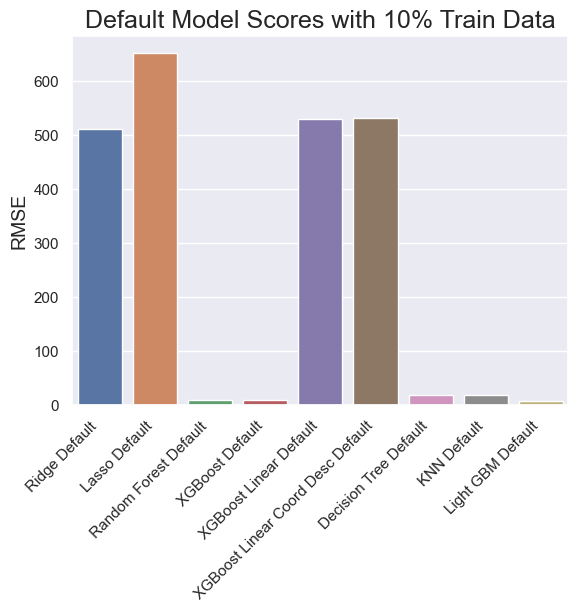

In [24]:
sns.barplot(data=defaults, x='Model', y='RMSE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('')
plt.title('Default Model Scores with 10% Train Data', fontsize = 18)
plt.xticks(rotation=45, ha='right')
plt.savefig('../figures/default_10_models.png',dpi=1200, bbox_inches='tight')
plt.show()

Next, to confirm that those with the lowest scores are truly the best, I'll prepare an 80% training data split and make a fresh set of default models, but this time trained with 8 times more data. 

In [25]:
# Train/test split with new variables for the 80% train splits
X_tr8, X_te8, y_tr8, y_te8 = train_test_split(X_train, y_train, test_size=0.2, random_state=15)

In [26]:
y_tr8 = y_tr8.values.ravel()
y_te8 = y_te8.values.ravel()

In [27]:
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(X_tr8, y_tr8)
y_pred = dummy_mean.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Mean Dummy Regressor', '% Train Data' : 80,\
                              'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

407.8835873965248


In [28]:
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(X_tr8, y_tr8)
y_pred = dummy_median.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Median Dummy Regressor', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

481.42949851544324


In [29]:
ols = LinearRegression()
ols.fit(X_tr8, y_tr8)
y_pred = ols.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'OLS', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

595.7929970468566


In [30]:
ridge=Ridge(random_state = 15)
ridge.fit(X_tr8, y_tr8)
y_pred = ridge.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Ridge Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

749.3996817736969


In [31]:
lasso=linear_model.Lasso(random_state = 15)
lasso.fit(X_tr8, y_tr8)
y_pred = lasso.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Lasso Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

1117.447869516571


C:\Users\zbro1\anaconda\envs\MOF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.903e+06, tolerance: 6.697e+03
  model = cd_fast.enet_coordinate_descent(


In [32]:
forest = RandomForestRegressor(max_depth=10, n_jobs = -1, random_state=15)
forest.fit(X_tr8, y_tr8)
y_pred = forest.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Random Forest Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

8.758268556973261

In [33]:
xgb = XGBRegressor(max_depth=10, seed=15)
xgb.fit(X_tr8, y_tr8)
y_pred = xgb.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'XGBoost Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

5.914174006156657

In [34]:
xgb_linear = XGBRegressor(booster = 'gblinear', seed=15)
xgb_linear.fit(X_tr8, y_tr8)
y_pred = xgb_linear.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'XGBoost Linear Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

866.1388239251701

In [35]:
xgb_linear_lcd = XGBRegressor(booster = 'gblinear', updater = 'coord_descent', seed=15)
xgb_linear_lcd.fit(X_tr8, y_tr8)
y_pred = xgb_linear_lcd.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'XGBoost Linear Coord Desc Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

858.5228363083651

In [36]:
dtree = tree.DecisionTreeRegressor(max_depth = 10, random_state = 15)
dtree.fit(X_tr8, y_tr8)
y_pred = dtree.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Decision Tree Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

12.807884945870498

In [37]:
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_tr8, y_tr8)
y_pred = knn.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'KNN Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

15.338097442830566

In [38]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', max_depth = 10, data_random_seed = 15)
lgbm.fit(X_tr8, y_tr8)
y_pred = lgbm.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 2, 'Model' : 'Light GBM Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

6.69894165194161

Now I'll update my graph of model RMSE setting the 10% and 80% train data models next to each other to see if the same trends persist. 

In [39]:
train_scores

,Iteration,Model,% Train Data,RMSE
0,1,Mean Dummy Regressor,10,408.049077
0,1,Median Dummy Regressor,10,478.306221
0,1,OLS,10,405.380587
0,1,Ridge Default,10,511.830246
0,1,Lasso Default,10,651.815392
0,1,Random Forest Default,10,10.401283
0,1,XGBoost Default,10,9.916792
0,1,XGBoost Linear Default,10,530.951800
0,1,XGBoost Linear Coord Desc Default,10,532.266089
0,1,Decision Tree Default,10,19.161487


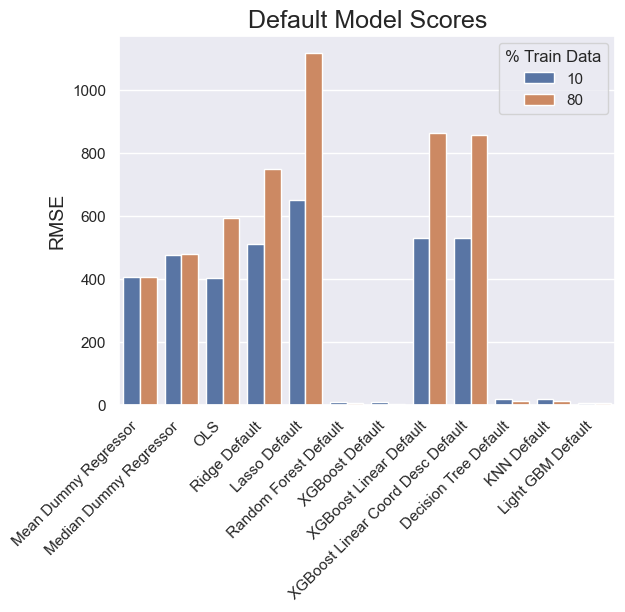

In [40]:
sns.barplot(data=train_scores, x='Model', y='RMSE', hue = '% Train Data')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('')
plt.title('Default Model Scores', fontsize = 18)
plt.xticks(rotation=45, ha='right')
plt.savefig('../figures/default_models_80.png',dpi=1200, bbox_inches='tight')
plt.show()

Ok, now that I've got an idea of which models are likely to be the best performers I'll go ahead and do some hyperparameter tuning on the top performers using 10% train data.

In [41]:
parameters = {'max_features': sp_randFloat(0.1, 0.9),
             'max_depth': sp_randInt(3,8),
             'min_samples_leaf': sp_randInt(200,800),
             'n_estimators': sp_randInt(500,1000)
             }
forest = RandomForestRegressor(n_jobs=-1, random_state=15)
forest_reg = RandomizedSearchCV(forest, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
rand_forest = forest_reg.fit(X_tr, y_tr)
rand_forest.best_params_

{'max_depth': 4,
 'max_features': 0.7479325890583333,
 'min_samples_leaf': 223,
 'n_estimators': 916}

In [42]:
opt_forest = RandomForestRegressor(n_estimators=rand_forest.best_params_['n_estimators'],\
                                   max_features=rand_forest.best_params_['max_features'],\
                                   min_samples_leaf=rand_forest.best_params_['min_samples_leaf'],\
                                   max_depth=rand_forest.best_params_['max_depth'], n_jobs = -1, random_state=15)
opt_forest.fit(X_tr, y_tr)
y_pred = opt_forest.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 3, 'Model' : 'Random Forest', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

21.703353886640862

In [43]:
xgb = XGBRegressor()
parameters = {'n_estimators': sp_randInt(500,1000),
             'max_depth': sp_randInt(2,9),
             'eta': sp_randFloat(0.0001,0.99),
             'colsample_bytree': sp_randFloat(0.01,0.99)} 
rand_xgb = RandomizedSearchCV(xgb, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
xgbooster = rand_xgb.fit(X_tr, y_tr)
xgbooster.best_params_

{'colsample_bytree': 0.8251957339723341,
 'eta': 0.25666285593588023,
 'max_depth': 3,
 'n_estimators': 732}

In [44]:
xgb_model = XGBRegressor(n_estimators=xgbooster.best_params_['n_estimators'],\
                                   eta=xgbooster.best_params_['eta'],\
                                   colsample_bytree=xgbooster.best_params_['colsample_bytree'],\
                                   max_depth=xgbooster.best_params_['max_depth'])
xgb_model.fit(X_tr, y_tr)
y_pred = xgb_model.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 3, 'Model' : 'XGBoost', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

8.56193277736081

In [45]:
d_tree = tree.DecisionTreeRegressor(random_state = 12)
parameters = {'max_depth': sp_randInt(2,8),
             'min_samples_leaf': sp_randInt(100,5000)}
rand_tree = RandomizedSearchCV(d_tree, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
decision_tree = rand_tree.fit(X_tr, y_tr)
decision_tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 243}

In [46]:
decision_tree_model = tree.DecisionTreeRegressor(max_depth = decision_tree.best_params_['max_depth'],\
                                            min_samples_leaf = decision_tree.best_params_['min_samples_leaf'],\
                                            random_state = 15)
decision_tree_model.fit(X_tr, y_tr)
y_pred = decision_tree_model.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 3, 'Model' : 'Decision Tree', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

24.548323937221642

In [47]:
neighbors = KNeighborsRegressor()
parameters = {'n_neighbors': sp_randInt(10,100)}
rand_knn = RandomizedSearchCV(neighbors, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
opt_nn = rand_knn.fit(X_tr, y_tr)
opt_nn.best_params_

{'n_neighbors': 10}

In [48]:
knn_opt = KNeighborsRegressor(n_neighbors = opt_nn.best_params_['n_neighbors'])
knn_opt.fit(X_tr, y_tr)
y_pred = knn_opt.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 3, 'Model' : 'KNN', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

19.799595208425472

In [49]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse')
parameters = {'num_leaves': sp_randInt(10,1000),
              'n_estimators': sp_randInt(10,1000),
              'max_depth': sp_randInt(2,10),
              'learning_rate': sp_randFloat(0.001,1)}
rand_lgbm = RandomizedSearchCV(lgbm, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
opt_lgbm = rand_lgbm.fit(X_tr, y_tr)
opt_lgbm.best_params_

{'learning_rate': 0.08840125949289224,
 'max_depth': 7,
 'n_estimators': 976,
 'num_leaves': 563}

In [50]:
lgbm_opt = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', num_leaves = opt_lgbm.best_params_['num_leaves'],\
                             n_estimators = opt_lgbm.best_params_['n_estimators'],\
                             max_depth = opt_lgbm.best_params_['max_depth'],\
                             learning_rate = opt_lgbm.best_params_['learning_rate'])
lgbm_opt.fit(X_tr, y_tr)
y_pred = lgbm_opt.predict(X_te)
new_row = pd.DataFrame([{'Iteration' : 3, 'Model' : 'Light GBM', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

7.777510810502901

In [119]:
tuned = train_scores[train_scores['Model'].isin(['Light GBM', 'XGBoost', 'Random Forest', 'KNN', 'Decision Tree'])]

In [120]:
tuned

,Iteration,Model,% Train Data,RMSE
0,3,Random Forest,10,21.703354
0,3,XGBoost,10,8.561933
0,3,Decision Tree,10,24.548324
0,3,KNN,10,19.799595
0,3,Light GBM,10,7.777511
0,4,XGBoost,80,6.258509
0,4,Light GBM,80,4.829893
0,5,Light GBM,80,4.853825
0,6,Light GBM,100,4.407533


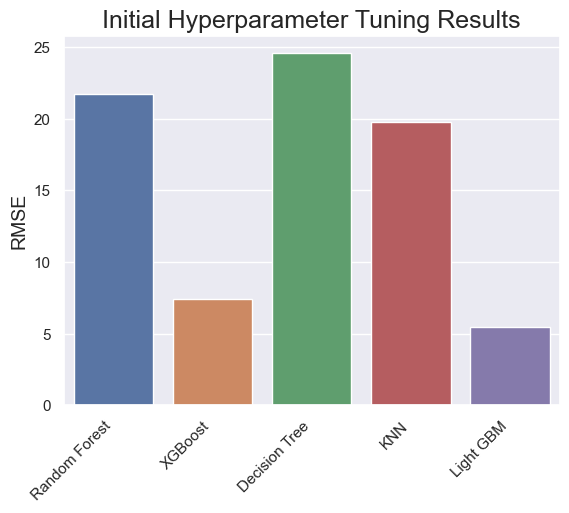

In [123]:
sns.barplot(data=tuned, x='Model', y='RMSE', errorbar = None)
plt.ylabel('RMSE', fontsize = 14)
plt.title('Initial Hyperparameter Tuning Results', fontsize = 18)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.savefig('../figures/init_hyper_tune.png',dpi=1200, bbox_inches='tight')
plt.show()

Ok, so I'm getting about 3x better results with XGBoost and Light GBM, but they're both pretty close to each other, so I'll train those models on 80% of the data and see how they compare so that I can further refine their hyperparameters.

In [55]:
xgb_model.fit(X_tr8, y_tr8)
y_pred = xgb_model.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 4, 'Model' : 'XGBoost', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

6.258508844363109

In [56]:
lgbm_opt.fit(X_tr8, y_tr8)
y_pred = lgbm_opt.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 4, 'Model' : 'Light GBM', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

4.829893089853138

Great, they're both performing quite well, but I want to tune just one model, so I'll stick with Light GBM from here on since it has consistently beaten XGBoost by a little bit. I'll check the hyperparameter tuning results from earlier to get a feel for whether I can further improve it.

In [57]:
lgbm_results = pd.DataFrame(opt_lgbm.cv_results_)
lgbm_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_num_leaves', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

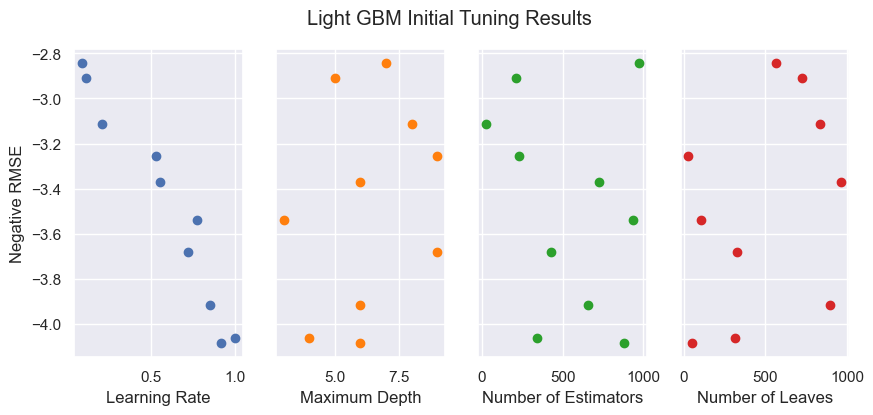

In [58]:
fig, axs = plt.subplots(1, 4, sharey=True)
axs[0].plot(lgbm_results['param_learning_rate'], lgbm_results['mean_test_score'], ls='', marker='o')
axs[1].plot(lgbm_results['param_max_depth'], lgbm_results['mean_test_score'], 'tab:orange', ls='', marker='o')
axs[2].plot(lgbm_results['param_n_estimators'], lgbm_results['mean_test_score'], 'tab:green', ls='', marker='o')
axs[3].plot(lgbm_results['param_num_leaves'], lgbm_results['mean_test_score'], 'tab:red', ls='', marker='o')
axs[0].set_ylabel('Negative RMSE')
axs[0].set_xlabel('Learning Rate')
axs[1].set_xlabel('Maximum Depth')
axs[2].set_xlabel('Number of Estimators')
axs[3].set_xlabel('Number of Leaves')
fig.suptitle('Light GBM Initial Tuning Results')

fig.set_size_inches(10, 4)
plt.savefig('../figures/lgbm_init_tuning.png', dpi=1200, bbox_inches='tight')
plt.show()

Interesting! Based on this it looks like max depth and number of estimators really aren't having much impact, but it does look like I should focus on smaller learning rates and numbers of leaves around 500-800. I'll tune those using this larger training set.

In [59]:
lgb2 = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', n_estimators = opt_lgbm.best_params_['n_estimators'],
              max_depth = opt_lgbm.best_params_['max_depth'])
parameters = {'num_leaves': sp_randInt(450,800),              
              'learning_rate': sp_randFloat(0.00001,0.1)}
rlgb2 = RandomizedSearchCV(lgb2, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
olgb2 = rlgb2.fit(X_tr8, y_tr8)
olgb2.best_params_

{'learning_rate': 0.08071794822453758, 'num_leaves': 607}

In [60]:
lgb2_opt = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', num_leaves = olgb2.best_params_['num_leaves'],\
                             n_estimators = opt_lgbm.best_params_['n_estimators'],\
                             max_depth = opt_lgbm.best_params_['max_depth'],\
                             learning_rate = olgb2.best_params_['learning_rate'])
lgb2_opt.fit(X_tr8, y_tr8)
y_pred = lgb2_opt.predict(X_te8)
new_row = pd.DataFrame([{'Iteration' : 5, 'Model' : 'Light GBM', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

4.853824705560305

Ok, so I actually got a little worse, from 4.8299 to 4.8538, which means I've probably optimized this model about as far as I possibly can. Let's plot the progression of the Light GBM models from my initial evaluation up to now.

In [61]:
lgbm_scores = train_scores[train_scores['Model'].isin(['Light GBM', 'Light GBM Default'])]

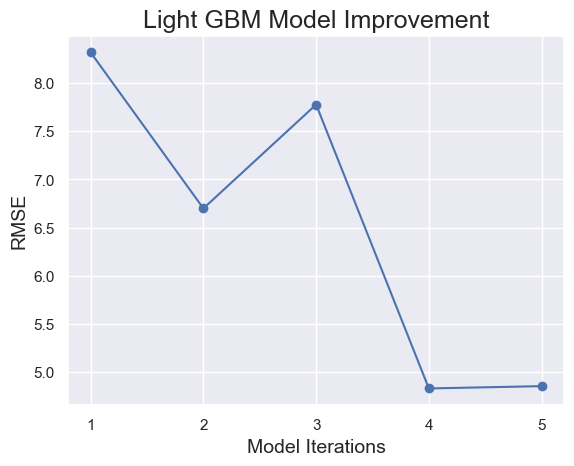

In [124]:
plt.plot(lgbm_scores['Iteration'], lgbm_scores['RMSE'], ls='-', marker='o')
plt.xlabel('Model Iterations', fontsize = 14)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.ylabel('RMSE', fontsize = 14)
plt.title('Light GBM Model Improvement', fontsize = 18)
plt.savefig('../figures/lgbm_improvement.png', dpi=1200, bbox_inches='tight')
plt.show()

Since my best model was the fourth iteration I'll train that as the final model on the entire X_train and y_train dataset and put it to the final test using the X_test and y_test dataset.

In [64]:
X_test = pd.read_csv('../data/processed/X_test.csv', index_col = 'filename')
y_test = pd.read_csv('../data/processed/y_test.csv', index_col = 0)

In [65]:
lgb4_opt = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', num_leaves = opt_lgbm.best_params_['num_leaves'],\
                             n_estimators = opt_lgbm.best_params_['n_estimators'],\
                             max_depth = opt_lgbm.best_params_['max_depth'],\
                             learning_rate = opt_lgbm.best_params_['learning_rate'])
lgb4_opt.fit(X_train, y_train)
y_pred = lgb4_opt.predict(X_test)
new_row = pd.DataFrame([{'Iteration' : 6, 'Model' : 'Light GBM', '% Train Data' : 100, 'RMSE' : mean_squared_error(y_test, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_test, y_pred)

4.4075329183740095

Hey! It performed even better using the full train data. I'm happy with that result.

Now I need to check the feature importances for this model to identify exactly which features help the most in predicting the volumetric CO2 working capacity of a MOF.

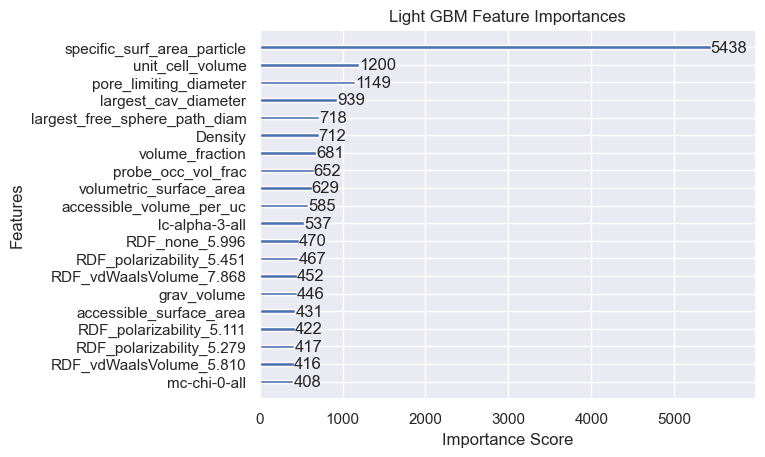

In [66]:
lgb.plot_importance(lgb4_opt, title = 'Light GBM Feature Importances', xlabel = 'Importance Score', max_num_features = 20)
plt.savefig('../figures/feat_importances.png', dpi=1200, bbox_inches='tight')
plt.show()

This is unexpected, the specific surface area is far and away the most important feature to this model, and I haven't even plotted the correlation with volumetric working capacity yet. Let's do that to see what I missed in EDA.

In [84]:
# Aligning indices between X_train and y_train to put the fields of interest in one dataframe
y_train_ind = y_train.set_index(keys = X_train.index)

In [88]:
corr_data = pd.concat([X_train[['specific_surf_area_particle']], y_train_ind], axis = 1)

In [89]:
corr_data

,specific_surf_area_particle,0
filename,,
DB0-m3_o25_o84_f0_fsc.sym.10.cif,5713.448668,82.851179
DB0-m2_o26_o27_f0_pcu.sym.20.cif,1.336847,1.141462
DB0-m3_o23_o23_f0_nbo.sym.54.cif,1.250698,0.623254
DB0-m3_o1_o146_f0_fsc.sym.37.cif,1200.034795,32.874921
DB0-m29_o89_o500_f0_pts.sym.68.cif,457.122921,20.352463
...,...,...
DB0-m3_o4_o6_f0_nbo.sym.38.cif,4.294294,1.986233
DB1-Cu2N8-ADC_B-DPAC_B_No119.cif,317.033229,15.093653
DB0-m3_o24_o1500_f0_fsc.sym.1.cif,926.027579,36.269572


In [94]:
# Renaming the y_train column so I can call it in my plotting function
corr_data.rename(columns={'specific_surf_area_particle':'specific_surf_area_particle', '0':'vol_working_capacity'},\
                 inplace=True)

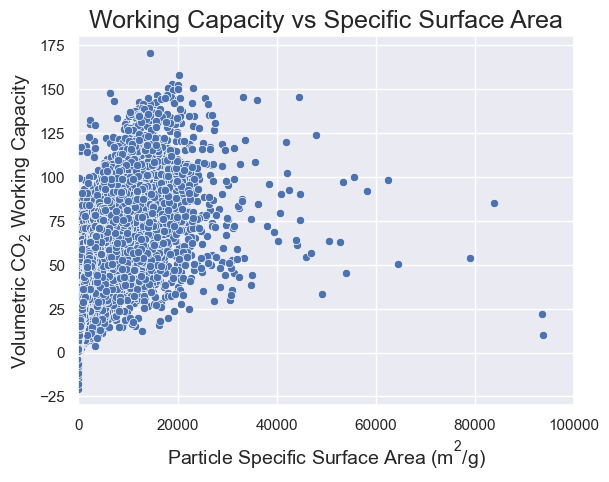

In [118]:
sns.scatterplot(corr_data, x='specific_surf_area_particle', y='vol_working_capacity')
plt.xlim(0,100000)
plt.xlabel('Particle Specific Surface Area ($m^2$/g)', fontsize = 14)
plt.ylabel('Volumetric $CO_2$ Working Capacity', fontsize = 14)
plt.title('Working Capacity vs Specific Surface Area', fontsize = 18)
plt.savefig('../figures/spec_surf_area.png', dpi = 1200, bbox_inches='tight')
plt.show()

Now I need to make sure to save the model for future use.

In [127]:
lgb4_opt.booster_.save_model('../models/lgbm_final.txt')